# Visualise simple harmonic oscillator using only forward Euler and RK4 integrators

In [ ]:
import sys
sys.path.append('..')

import numpy as np
from matplotlib import pyplot as plt
from Code.dynamical_system import *
from Code.time_integrator import *

##Define parameters for the harmonic oscillator

In [ ]:
np.random.seed(2512517)
mass = 1.2
k_spring = 0.9
dt = 0.001
T_final = 100.0
harmonic_oscillator = HarmonicOscillator(mass,k_spring)
forward_euler_integrator = ForwardEulerIntegrator(harmonic_oscillator,dt)
rk4_integrator = RK4Integrator(harmonic_oscillator,dt)
x = np.zeros(1)
v = np.zeros(1)
x[0] = 2.0
v[0] = 0.0

##Integrate using the given numerical methods

In [ ]:
n_step = int(T_final/dt)
energies = np.zeros((2,n_step))
x_phase = np.zeros((2,n_step))
v_phase = np.zeros((2,n_step))

for j, integrator in enumerate((forward_euler_integrator,rk4_integrator)):
    integrator.set_state(x,v)
    for k in range(n_step):
        energies[j,k] = harmonic_oscillator = HarmonicOscillator(mass,k_spring).energy(integrator.x,integrator.v)
        x_phase[j,k] = integrator.x[0]
        v_phase[j,k] = integrator.v[0]
        integrator.integrate(1)    

## Plot phase space diagrams for each integrator 

<Figure size 432x288 with 0 Axes>

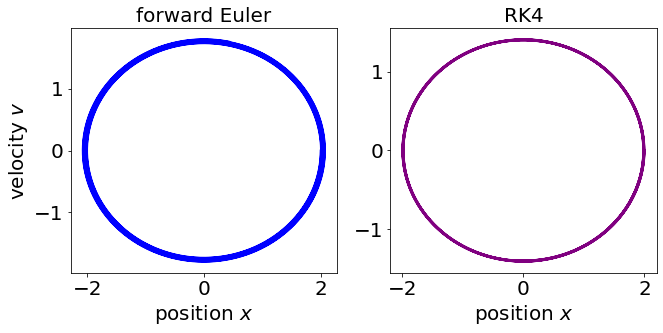

In [ ]:
plt.clf()
figs, axs = plt.subplots(1,2)
X = dt*np.arange(n_step)
axs[0].plot(x_phase[0,:],v_phase[0,:],linewidth=2,color='blue')
axs[0].set_title('forward Euler')
axs[0].set_xlabel('position $x$')
axs[0].set_ylabel('velocity $v$')
axs[1].plot(x_phase[1,:],v_phase[1,:],linewidth=2,color='purple')
axs[1].set_title('RK4')
axs[1].set_xlabel('position $x$')
#figs.tight_layout()
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
figs.set_size_inches(10.5, 4.5)

## Plot energy drift for each integrator

<Figure size 432x288 with 0 Axes>

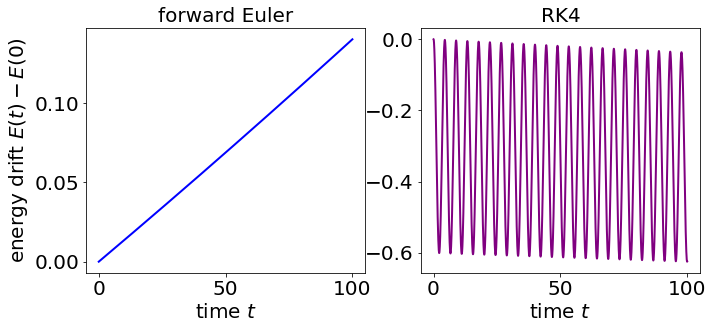

In [ ]:
plt.clf()
figs, axs = plt.subplots(1,2)
X = dt*np.arange(n_step)
axs[0].plot(X,energies[0,:]-energies[0,0],linewidth=2,color='blue')
#axs[0].set_ylabel('energy drift $E(t)-E(0)$')
axs[0].set_title('forward Euler')
axs[0].set_xlabel('time $t$')
axs[0].set_ylabel('energy drift $E(t) - E(0)$')
#axs[0].set_ylim(0,0.015)
axs[1].plot(X,energies[1,:]-energies[1,0],linewidth=2,color='purple')
axs[1].set_title('RK4')
axs[1].set_xlabel('time $t$')
#figs.tight_layout()
figs.set_size_inches(11, 4.5)
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.savefig('energies.pdf',bbox_inches='tight')